In [3]:
import pandas as pd
import numpy as np
import load_data

df = load_data.historical_from_csv()
print(df)

          trade_id     price    amount  taker_side_sell currency_pair  \
0        438217572   1775.85  0.168946                1       eth-usd   
1        438217573   1775.86  0.864393                1       eth-usd   
2        438217574   1775.87  0.620000                1       eth-usd   
3        438217575   1775.88  0.650000                1       eth-usd   
4        438217576   1775.87  0.023972                1       eth-usd   
...            ...       ...       ...              ...           ...   
1399902  518465946  28177.78  0.002946                0       btc-usd   
1399903  518465947  28175.36  0.001179                0       btc-usd   
1399904  518465948  28174.91  0.008500                0       btc-usd   
1399905  518465949  28175.37  0.004210                1       btc-usd   
1399906  518465950  28175.37  0.000192                1       btc-usd   

                       timestamp  
0        2023-03-27 00:00:00.129  
1        2023-03-27 00:00:00.129  
2        2023-03-2

In [2]:
# check the anamolies for the data 
duplicateCase = df[df.duplicated(['timestamp', 'trade_id', 'amount'], keep=False)]
duplicateCase

,Unnamed: 0.1,Unnamed: 0,timestamp,trade_id,price,amount,taker_side_sell,currency_pair
51005,51005,51005,2023-03-01 03:56:22.993,429140840,1635.84,0.444417,1,eth-usd
51006,51006,51006,2023-03-01 03:56:22.993,429140840,1635.84,0.444417,1,eth-usd
51010,51010,51010,2023-03-01 03:56:24.910,429140844,1635.85,0.135290,0,eth-usd
51011,51011,51011,2023-03-01 03:56:24.910,429140844,1635.85,0.135290,0,eth-usd
51012,51012,51012,2023-03-01 03:56:24.910,429140844,1635.85,0.135290,0,eth-usd
...,...,...,...,...,...,...,...,...
23924457,23042723,23042723,2023-03-31 20:11:26.484,516761557,28413.52,0.010000,1,btc-usd
24083761,23408346,23408346,2023-04-01 09:37:13.215,516924136,28479.35,0.005000,1,btc-usd
24083762,23408347,23408347,2023-04-01 09:37:13.215,516924136,28479.35,0.005000,1,btc-usd
24183761,23508346,23508346,2023-04-01 18:44:09.751,517025626,28363.22,0.000141,1,btc-usd


In [3]:
# we drop the columns that has excatly same timestamp, trade_id, and amount
duplicateCase.shape[0]
df.drop_duplicates(subset=["timestamp", "trade_id", "amount"], keep="last", inplace=True)

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,timestamp,trade_id,price,amount,taker_side_sell,currency_pair
0,0,0,2023-03-01 00:00:00.295,429089835,1605.59,0.051726,0,eth-usd
1,1,1,2023-03-01 00:00:00.295,429089836,1605.60,1.245640,0,eth-usd
2,2,2,2023-03-01 00:00:00.295,429089837,1605.62,0.080871,0,eth-usd
3,3,3,2023-03-01 00:00:00.295,429089838,1605.62,0.000953,0,eth-usd
4,4,4,2023-03-01 00:00:00.855,429089839,1605.58,0.031282,1,eth-usd
...,...,...,...,...,...,...,...,...
24250931,23575516,23575516,2023-04-01 23:59:57.530,517093848,28471.20,0.004681,1,btc-usd
24250932,23575517,23575517,2023-04-01 23:59:58.316,517093849,28470.91,0.000141,1,btc-usd
24250933,23575518,23575518,2023-04-01 23:59:58.369,517093850,28469.60,0.001419,0,btc-usd
24250934,23575519,23575519,2023-04-01 23:59:58.899,517093851,28470.89,0.000365,1,btc-usd


In [38]:
df.isnull().sum()

timestamp          0
trade_id           0
price              0
amount             0
taker_side_sell    0
currency_pair      0
dtype: int64

The above result showed that now our data frame is working without any anomalies. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685506 entries, 0 to 686723
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        685506 non-null  object 
 1   trade_id         685506 non-null  float64
 2   price            685506 non-null  float64
 3   amount           685506 non-null  float64
 4   taker_side_sell  685506 non-null  float64
 5   currency_pair    685506 non-null  object 
dtypes: float64(4), object(2)
memory usage: 36.6+ MB


In [40]:
df.describe()

,trade_id,price,amount,taker_side_sell
count,6.855060e+05,685506.000000,6.855060e+05,685506.000000
mean,4.673604e+08,12852.572434,2.509074e-01,0.409627
std,3.730337e+07,10971.258258,1.024793e+00,0.491765
min,4.290898e+08,1595.000000,1.000000e-08,0.000000
25%,4.292615e+08,1653.090000,2.771265e-03,0.000000
50%,5.037130e+08,23136.760000,2.105114e-02,0.000000
75%,5.038847e+08,23667.490000,1.231579e-01,1.000000
max,5.040561e+08,23999.990000,2.100030e+02,1.000000


In [41]:
df.describe(include="object")

,timestamp,currency_pair
count,685506,685506
unique,383357,2
top,2023-03-01 02:14:38.931000064,btc-usd
freq,255,350019


In [56]:
# check if there is any correlation between different colmuns 
df.corr()

/var/folders/nv/_lx3265n1ylgqznjwtpq7p200000gn/T/ipykernel_8559/1235333285.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,trade_id,price,amount,taker_side_sell
trade_id,1.000000,0.999929,-0.215521,0.015693
price,0.999929,1.000000,-0.215453,0.015551
amount,-0.215521,-0.215453,1.000000,0.037306
taker_side_sell,0.015693,0.015551,0.037306,1.000000


In [57]:
# statistical summary per currency pair
#eth-usd 
df[df["currency_pair"]=="eth-usd"].describe()


,trade_id,price,amount,taker_side_sell
count,3.354870e+05,335487.000000,3.354870e+05,335487.000000
mean,4.292578e+08,1647.038076,4.764792e-01,0.401744
std,9.691932e+04,14.894905,1.426572e+00,0.490252
min,4.290898e+08,1595.000000,1.000000e-08,0.000000
25%,4.291740e+08,1642.100000,1.659707e-02,0.000000
50%,4.292579e+08,1652.930000,7.968810e-02,0.000000
75%,4.293418e+08,1656.020000,3.700000e-01,1.000000
max,4.294256e+08,1669.900000,2.100030e+02,1.000000


In [58]:
# statistical summary per currency pair
# btc-usd
df[df["currency_pair"]=="btc-usd"].describe()


,trade_id,price,amount,taker_side_sell
count,3.500190e+05,350019.000000,3.500190e+05,350019.000000
mean,5.038810e+08,23592.878260,3.470081e-02,0.417183
std,1.011067e+05,184.376686,1.033113e-01,0.493094
min,5.037058e+08,23025.170000,1.000000e-08,0.000000
25%,5.037936e+08,23474.325000,1.072875e-03,0.000000
50%,5.038811e+08,23663.550000,5.186840e-03,0.000000
75%,5.039686e+08,23722.670000,2.824011e-02,1.000000
max,5.040561e+08,23999.990000,1.126763e+01,1.000000


In [59]:
# average price per currency pair
df.groupby("currency_pair")["price"].mean()

currency_pair
btc-usd    23592.878260
eth-usd     1647.038076
Name: price, dtype: float64

(array([335487.,      0.,      0.,      0., 350019.]),
 array([ 1595.   ,  6075.998, 10556.996, 15037.994, 19518.992, 23999.99 ]),
 <BarContainer object of 5 artists>)

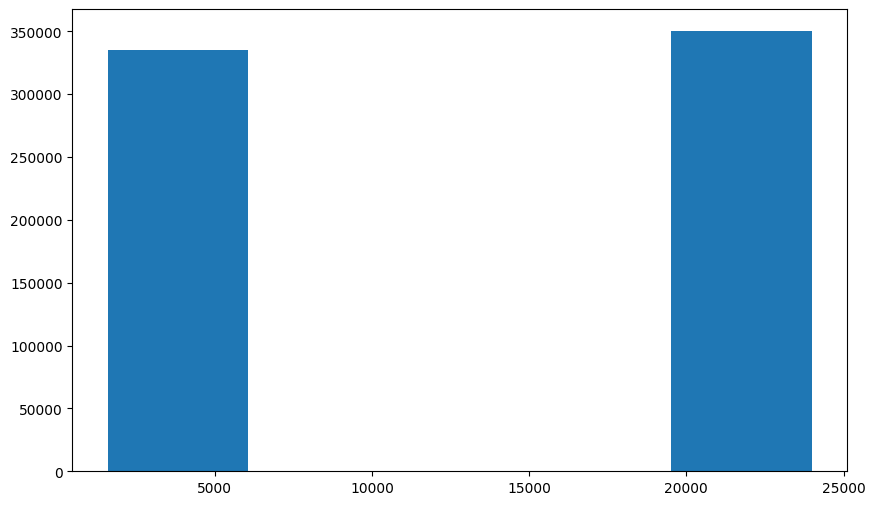

In [70]:
# plot price distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df["price"], bins=5)

In [63]:
# split data by currency pair
grouped = df.groupby('currency_pair')

# access data for specific group
price_eth = grouped.get_group('eth-usd')
price_btc = grouped.get_group('btc-usd')

In [73]:
# Using price_eth and price_btc tables
# Extract relevant price column

currency_eth_prices = price_eth['price']
currency_btc_prices = price_btc['price']


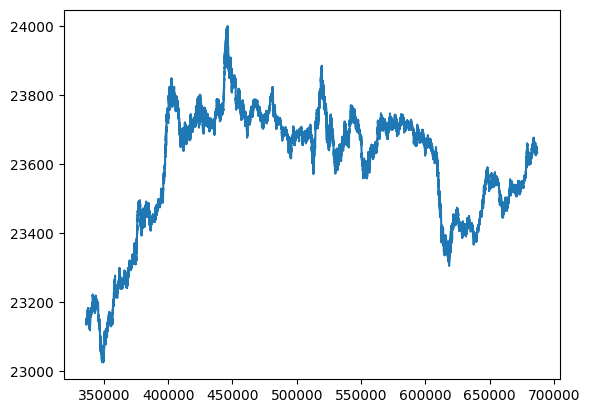

In [75]:
# plot price per currency pair

import matplotlib.pyplot as plt

plt.plot(currency_btc_prices)